<a href="https://colab.research.google.com/github/Hasan-Iqtedar/EuroSAT-classification/blob/master/EusatHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Using tensorflow 1
!pip install tensorflow==1.15.0

print('Hello World')

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 3.8MB 25.8MB/s 
     |████████████████████████████████| 512kB 39.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8ae2b405e312abaad1e378285c17d794998a04b9ef82de6cb2badffe12350605
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: 

In [ ]:
#Testing tf.
import tensorflow as tf
a = tf.constant(2)
b = tf.constant(3)

c = a*b

print(tf.__version__)

with tf.Session() as sess:
  print(sess.run(c))

1.15.0
6


In [ ]:
pip install tensorflow-datasets

In [ ]:
import tensorflow_datasets as tfds
#Loading the data.
data, info = tfds.load("eurosat", split = 'train', with_info=True, as_supervised=True)


Shuffling and writing examples to /root/tensorflow_datasets/eurosat/rgb/2.0.0.incompleteVKBU1G/eurosat-train.tfrecord


Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np
img = list()
lbl = list()
x = np.zeros((27000,64,64,3))
y = np.zeros((27000,1))
m = 0

#Converting the data into numpy arrays and then storing it in the matrices x and y.
for ex in tfds.as_numpy(data):
  image, label = ex
  img.append(image)
  lbl.append(label)
  x[m,:,:,:] = image
  y[m,:] = label
  m += 1 


  

27000 27000
label[27]: 0
x: (27000, 64, 64, 3)
img[27]: (64, 64, 3)
X[27]: (64, 64, 3)
y[27] [0.]


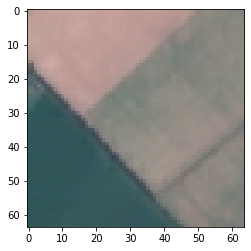

In [ ]:
#Checking the images.
print(len(img), len(lbl))
import matplotlib.pyplot as plt
print("label[27]:",lbl[27])
plt.imshow(img[27])
print("x:",x.shape)
print("img[27]:",img[27].shape)
print("X[27]:",x[27].shape)
print("y[27]", y[27])

del img
del lbl

In [ ]:
def one_hot_matrix(labels, classes):
  C = tf.constant(classes, name = 'C')

  oneHotMatrix = tf.one_hot(labels, C, axis = 0)

  with tf.Session() as sess:
    one_hot = sess.run(oneHotMatrix)

  return one_hot  

In [ ]:
#Testing the one_hot_matrix function
one_hot = one_hot_matrix([1,2,0,9,4,5,6,7,2,3], 10)
print(one_hot)
print('**', one_hot.shape)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
** (10, 10)


In [ ]:
print(y.T.shape)
yhot = y.T.reshape(27000)
print(y[0])
print(yhot[ 0:9])
yhot = one_hot_matrix(yhot, 10).T
print(yhot.shape)
print(yhot[:,0])


(1, 27000)
[4.]
[4. 8. 8. 8. 9. 1. 2. 4. 8.]
(27000, 10)
[0. 0. 0. ... 1. 0. 0.]


In [ ]:
#one hot labels.
#Y = yhot 

permutation = list(np.random.permutation(x.shape[0]))
x = x[permutation, :]
yhot = yhot[permutation, :]

#del shuffled_x
#del shuffled_y

#Dividing the examples in train and test sets.
X_train = x[0:24300, :, :, :]
Y_train = yhot[0:24300, :]
X_test = x[24300 : , :, :, :]
Y_test = yhot[24300 : , :]

#Normalizing train and test sets.
X_train = X_train/255
X_test = X_test/255
print("Number of training examples:",X_train.shape[0])
print("Number of test examples: ",X_test.shape[0])
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

del x
del yhot
del y
#gc.collect()


Number of training examples: 24300
Number of test examples:  2700
X_train shape: (24300, 64, 64, 3)
Y_train shape: (24300, 10)
X_test shape: (2700, 64, 64, 3)
Y_test shape: (2700, 10)


In [ ]:
def create_placeholders(nH0, nW0, nC0, ny):
  #nH0: Height of the input image.
  #nW0: Width of the input image.
  #nC0: Number of channels of input.
  #ny : Number of classes.
  
  #X for image inputs and Y for labels.
  X = tf.placeholder(tf.float32, shape = (None, nH0, nW0, nC0))
  Y = tf.placeholder(tf.float32, shape = (None, ny))
  #'del'
  #gc.collect()
  return X, Y



In [ ]:
def initialize_parameters():
  #Returns parameters initialized in a dictionary named parameters.
  
  tf.set_random_seed(1) 
  
  regularizer = tf.contrib.layers.l2_regularizer(scale = 0.09) 

  W1 = tf.get_variable('W1', [11,11,3,10], initializer = tf.contrib.layers.xavier_initializer(seed=0), regularizer = regularizer)
  W2 = tf.get_variable('W2', [5,5,10,15], initializer = tf.contrib.layers.xavier_initializer(seed=0), regularizer = regularizer)
  W3 = tf.get_variable('W3', [5,5,15,20], initializer = tf.contrib.layers.xavier_initializer(seed=0), regularizer = regularizer)
  W4 = tf.get_variable('W4', [3,3,20,30], initializer = tf.contrib.layers.xavier_initializer(seed=0), regularizer = regularizer)

  parameters = {'W1' : W1, 'W2' : W2, 'W3' : W3, 'W4' : W4}

  return parameters, regularizer

In [ ]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1[1,1,1] = \n" + str(parameters["W1"].eval()[1,1,1]))
    print("W1.shape: " + str(parameters["W1"].shape))
    print("\n")
    print("W2[1,1,1] = \n" + str(parameters["W2"].eval()[1,1,1]))
    print("W2.shape: " + str(parameters["W2"].shape))

W1[1,1,1] = 
[-0.03306317  0.00659073  0.05340987 -0.02431887  0.01017145  0.00870071
 -0.00072943 -0.01652123 -0.03981302 -0.0616875 ]
W1.shape: (11, 11, 3, 10)


W2[1,1,1] = 
[-0.04559696 -0.02286464  0.05650467  0.07859445  0.06993313  0.06450687
  0.09405608 -0.00296396 -0.0667281   0.04564598  0.08157583  0.01612794
  0.06711587 -0.03498307 -0.09766643]
W2.shape: (5, 5, 10, 15)


In [ ]:
def forward_propagation(X, parameters):

  W1 = parameters['W1']
  W2 = parameters['W2']
  W3 = parameters['W3']
  W4 = parameters['W4']
  
  #Convolutional Layer.
  Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
  A1 = tf.nn.relu(Z1)

  #Max Pool Layer.
  P1 = tf.nn.max_pool(A1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

  #Convolutional Layer.
  Z2 = tf.nn.conv2d(P1, W2, strides = [1,1,1,1], padding = 'SAME')
  A2 = tf.nn.relu(Z2)

  #Max Pool Layer.
  P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
  
  #Convolutional Layer.
  Z3 = tf.nn.conv2d(P2, W3, strides = [1,1,1,1], padding = 'SAME')
  A3 = tf.nn.relu(Z3)

  #Convolutional Layer.
  Z4 = tf.nn.conv2d(A3, W4, strides = [1,1,1,1], padding = 'SAME')
  A4 = tf.nn.relu(Z4)

  #Max Pool Layer.
  P3 = tf.nn.max_pool(A4, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

  #Flattening P3
  F = tf.contrib.layers.flatten(P3)

  #Fully Connected Layer.
  Z5 = tf.contrib.layers.fully_connected(F,128, activation_fn=None)
  
  #Fully Connected Layer.
  Z6 = tf.contrib.layers.fully_connected(Z5, 10, activation_fn = None)

  return Z6


In [ ]:
def computeCost(Z6, Y, regularizer):
  # Returns the cost

  reg_variables = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
  reg_term = tf.contrib.layers.apply_regularization(regularizer, reg_variables)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z6, labels = Y))

  cost += reg_term

  return cost
  



In [ ]:
def randomMiniBatches(X, Y, miniBatchSize, seed):
  np.random.seed(seed)
  m = X.shape[0]
  miniBatches = list()#List of all mini batches.

  #Shuffling the examples.
  permutation = list(np.random.permutation(m))
  shuffled_X = X[permutation, :]
  shuffled_Y = Y[permutation, :]
  
  #Total complete mini batches.
  numOfCompleteMiniBatches = int( m/miniBatchSize )
  #Computing the mini batches.
  for k in range(0, numOfCompleteMiniBatches):
    miniBatch_X = shuffled_X[ k*miniBatchSize : (k+1)*miniBatchSize, :]
    miniBatch_Y = shuffled_Y[ k*miniBatchSize : (k+1)*miniBatchSize, :]

    miniBatch = (miniBatch_X, miniBatch_Y)
    miniBatches.append(miniBatch)
    
    #For the last incomplete miniBatch.
    if m % miniBatchSize != 0:
      miniBatch_X = shuffled_X[ miniBatchSize : numOfCompleteMiniBatches, : ]
      miniBatch_Y = shuffled_Y[ miniBatchSize : numOfCompleteMiniBatches, : ]

      miniBatch = (miniBatch_X, miniBatch_Y)
      miniBatches.append(miniBatch)
    

  return miniBatches





In [ ]:
miniBatches = randomMiniBatches(X_train, Y_train, 64, 0)

print("Shape of mini batch 0: ", miniBatches[0][0].shape)

**** (24300, 10) 
 (24300, 64, 64, 3)
Shape of mini batch 0:  (64, 64, 64, 3)


In [ ]:
def model(X_train, Y_train, X_test, Y_test, learningRate = 0.0009, numOfEpochs = 50, miniBatchSize = 64):
  
  tf.reset_default_graph()
  tf.set_random_seed(1)
  seed = 3
  costs = list()
  #m is the number of training examples.
  #nH0 is the height of input image.
  #nW0 is the width of input image.
  #nC0 is the number of channels of the input image.
  #ny is the number of classes i.e 10
  (m, nH0, nW0, nC0) = X_train.shape
  ny = Y_train.shape[1]
  

  #Creating placeholders.
  X, Y = create_placeholders(nH0, nW0, nC0, ny)

  #Initializing parameters.
  parameters, regularizer = initialize_parameters()

  #Adding forward propagation to the tensorflow graph.
  Z6 = forward_propagation(X, parameters)

  #Adding a function to compute the cost in the tensorflow graph.
  cost = computeCost(Z6, Y, regularizer)

  #Defining the optimizer for back propagation.
  optimizer = tf.train.AdamOptimizer(learning_rate= learningRate).minimize(cost)

  init = tf.global_variables_initializer()

  with tf.Session() as sess:
    sess.run(init)

    for epoch in range(numOfEpochs):
      #
      miniBatchCost = 0.
      numOfMiniBatches = int(m/miniBatchSize)
      seed += 1

      miniBatches = randomMiniBatches(X_train, Y_train, miniBatchSize, seed) 
    
      for miniBatch in miniBatches:
        #
        (miniBatch_X, miniBatch_Y) = miniBatch

        _, tempCost = sess.run([optimizer, cost], feed_dict = {X: miniBatch_X, Y: miniBatch_Y})
        miniBatchCost = tempCost/numOfMiniBatches

      print ("Cost after epoch %i: %f" % (epoch, miniBatchCost))
      costs.append(miniBatchCost)
      if epoch > 15 and learningRate > 0.00001 :
        #Decay rate 0.01
        learningRate = learningRate/(1+epoch*0.01)   

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learningRate) + ", Reg scale = 0.09")
    plt.show()

    predict_op = tf.argmax(Z6, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
    #print('HELOO**')
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print("Accuracies:")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)





  return train_accuracy, test_accuracy, parameters


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Cost after epoch 0: 0.000613
Cost after epoch 1: 0.000312
Cost after epoch 2: 0.000188
Cost after epoch 3: 0.000103
Cost after epoch 4: 0.000224
Cost after epoch 5: 0.000151
Cost after epoch 6: 0.000110
Cost after epoch 7: 0.000129
Cost after epoch 8: 0.000042
Cost after epoch 9: 0.000044


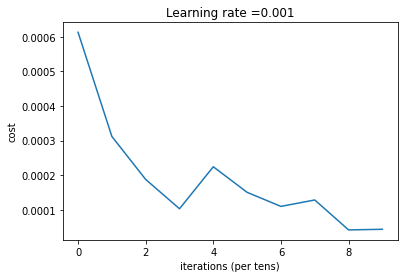

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.8885185
Test Accuracy: 0.7866667


In [ ]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.000574
Cost after epoch 1: 0.000236
Cost after epoch 2: 0.000139
Cost after epoch 3: 0.000134
Cost after epoch 4: 0.000125
Cost after epoch 5: 0.000110
Cost after epoch 6: 0.000127
Cost after epoch 7: 0.000146
Cost after epoch 8: 0.000082
Cost after epoch 9: 0.000061
Cost after epoch 10: 0.000109
Cost after epoch 11: 0.000034
Cost after epoch 12: 0.000049
Cost after epoch 13: 0.000042
Cost after epoch 14: 0.000043
Cost after epoch 15: 0.000062
Cost after epoch 16: 0.000024
Cost after epoch 17: 0.000011
Cost after epoch 18: 0.000036
Cost after epoch 19: 0.000054


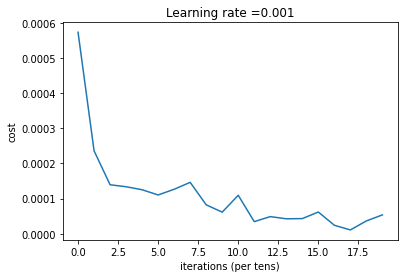

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.9246914
Test Accuracy: 0.78481483


In [ ]:
_,_,parameters = model(X_train, Y_train, X_test, Y_test, )

Cost after epoch 0: 0.001991
Cost after epoch 1: 0.001399
Cost after epoch 2: 0.001296
Cost after epoch 3: 0.001379
Cost after epoch 4: 0.001118
Cost after epoch 5: 0.001056
Cost after epoch 6: 0.001184
Cost after epoch 7: 0.000887
Cost after epoch 8: 0.000879
Cost after epoch 9: 0.000624


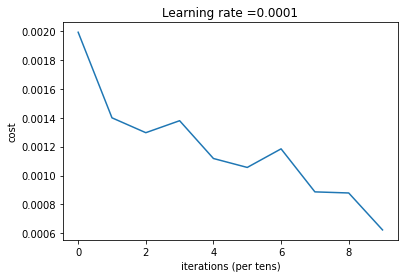

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.77148145
Test Accuracy: 0.74185187


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.002096
Cost after epoch 1: 0.001395
Cost after epoch 2: 0.001284
Cost after epoch 3: 0.001333
Cost after epoch 4: 0.001217
Cost after epoch 5: 0.001018
Cost after epoch 6: 0.001155
Cost after epoch 7: 0.000883
Cost after epoch 8: 0.000824
Cost after epoch 9: 0.000638
Cost after epoch 10: 0.000848
Cost after epoch 11: 0.000687
Cost after epoch 12: 0.000575
Cost after epoch 13: 0.000562
Cost after epoch 14: 0.000571
Cost after epoch 15: 0.000537
Cost after epoch 16: 0.000631
Cost after epoch 17: 0.000455
Cost after epoch 18: 0.000445
Cost after epoch 19: 0.000365
Cost after epoch 20: 0.000500
Cost after epoch 21: 0.000426
Cost after epoch 22: 0.000362
Cost after epoch 23: 0.000361
Cost after epoch 24: 0.000405
Cost after epoch 25: 0.000432
Cost after epoch 26: 0.000267
Cost after epoch 27: 0.000290
Cost after epoch 28: 0.000375
Cost after epoch 29: 0.000246


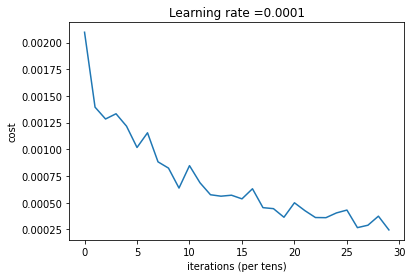

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.80539095
Test Accuracy: 0.7551852


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

In [ ]:
#Saving weights.
#model = create_model()
model.save_weights('./checkpoints/my_checkpoint')

model = create_model()

#Restoring weights.
model.load_weights('./checkpoints/my__checkpoint')

Cost after epoch 0: 0.000665
Cost after epoch 1: 0.000355
Cost after epoch 2: 0.000223
Cost after epoch 3: 0.000148
Cost after epoch 4: 0.000273
Cost after epoch 5: 0.000134
Cost after epoch 6: 0.000112
Cost after epoch 7: 0.000056
Cost after epoch 8: 0.000122
Cost after epoch 9: 0.000053
Cost after epoch 10: 0.000071
Cost after epoch 11: 0.000041
Cost after epoch 12: 0.000086
Cost after epoch 13: 0.000080
Cost after epoch 14: 0.000069
Cost after epoch 15: 0.000167
Cost after epoch 16: 0.000214
Cost after epoch 17: 0.000043
Cost after epoch 18: 0.000034
Cost after epoch 19: 0.000016
Cost after epoch 20: 0.000015
Cost after epoch 21: 0.000015
Cost after epoch 22: 0.000030
Cost after epoch 23: 0.000010
Cost after epoch 24: 0.000060
Cost after epoch 25: 0.000080
Cost after epoch 26: 0.000033
Cost after epoch 27: 0.000009
Cost after epoch 28: 0.000042
Cost after epoch 29: 0.000013


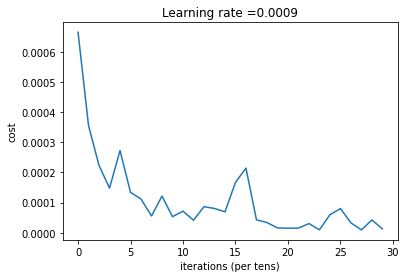

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.9590535
Test Accuracy: 0.78555554


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

**With Regularization**

Cost after epoch 0: 0.000753
Cost after epoch 1: 0.000460
Cost after epoch 2: 0.000391
Cost after epoch 3: 0.000415
Cost after epoch 4: 0.000249
Cost after epoch 5: 0.000294
Cost after epoch 6: 0.000268
Cost after epoch 7: 0.000285
Cost after epoch 8: 0.000230
Cost after epoch 9: 0.000201


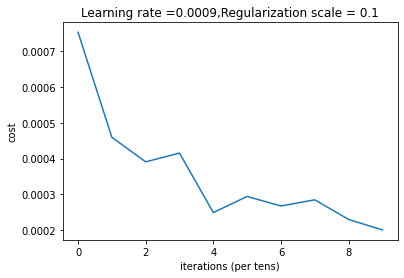

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.86020577
Test Accuracy: 0.7918519


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.002429
Cost after epoch 1: 0.001448
Cost after epoch 2: 0.001352
Cost after epoch 3: 0.001381
Cost after epoch 4: 0.001123
Cost after epoch 5: 0.001090
Cost after epoch 6: 0.001124
Cost after epoch 7: 0.001131
Cost after epoch 8: 0.000883
Cost after epoch 9: 0.000841


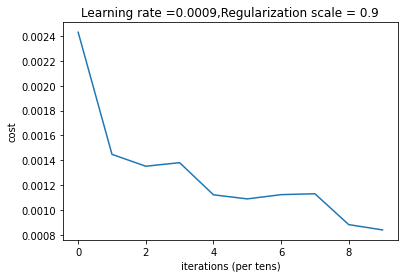

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.67703706
Test Accuracy: 0.6566667


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.000648
Cost after epoch 1: 0.000223
Cost after epoch 2: 0.000175
Cost after epoch 3: 0.000190
Cost after epoch 4: 0.000125
Cost after epoch 5: 0.000183
Cost after epoch 6: 0.000107
Cost after epoch 7: 0.000088
Cost after epoch 8: 0.000091
Cost after epoch 9: 0.000116


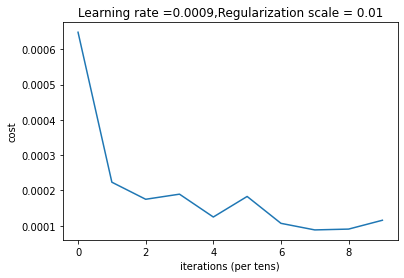

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.84720165
Test Accuracy: 0.7674074


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.000782
Cost after epoch 1: 0.000410
Cost after epoch 2: 0.000348
Cost after epoch 3: 0.000383
Cost after epoch 4: 0.000259
Cost after epoch 5: 0.000280
Cost after epoch 6: 0.000194
Cost after epoch 7: 0.000329
Cost after epoch 8: 0.000235
Cost after epoch 9: 0.000294


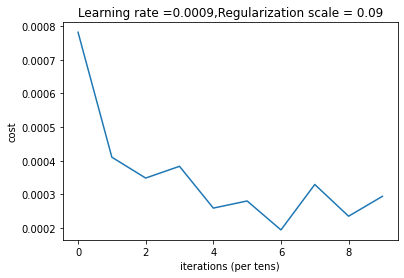

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.8369136
Test Accuracy: 0.75777775


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.002235
Cost after epoch 1: 0.001334
Cost after epoch 2: 0.001392
Cost after epoch 3: 0.001743
Cost after epoch 4: 0.001102
Cost after epoch 5: 0.001196
Cost after epoch 6: 0.001165
Cost after epoch 7: 0.000969
Cost after epoch 8: 0.000932
Cost after epoch 9: 0.000805
Cost after epoch 10: 0.000773
Cost after epoch 11: 0.000888
Cost after epoch 12: 0.000882
Cost after epoch 13: 0.000805
Cost after epoch 14: 0.000855
Cost after epoch 15: 0.000956
Cost after epoch 16: 0.000953
Cost after epoch 17: 0.000662
Cost after epoch 18: 0.000729
Cost after epoch 19: 0.000674
Cost after epoch 20: 0.000700
Cost after epoch 21: 0.000686
Cost after epoch 22: 0.000821
Cost after epoch 23: 0.000561
Cost after epoch 24: 0.000748
Cost after epoch 25: 0.000705
Cost after epoch 26: 0.000669
Cost after epoch 27: 0.000733
Cost after epoch 28: 0.000661
Cost after epoch 29: 0.000653


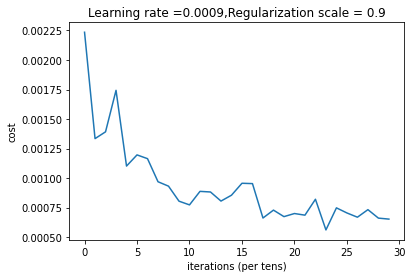

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.7668724
Test Accuracy: 0.7162963


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.002216
Cost after epoch 1: 0.001315
Cost after epoch 2: 0.001311
Cost after epoch 3: 0.001462
Cost after epoch 5: 0.001266
Cost after epoch 6: 0.001277
Cost after epoch 7: 0.001023
Cost after epoch 8: 0.000840
Cost after epoch 9: 0.000805
Cost after epoch 10: 0.000786
Cost after epoch 11: 0.000927
Cost after epoch 12: 0.000798
Cost after epoch 13: 0.000788
Cost after epoch 14: 0.000862
Cost after epoch 15: 0.001000
Cost after epoch 16: 0.000831
Cost after epoch 17: 0.000669
Cost after epoch 18: 0.000811
Cost after epoch 19: 0.000584
Cost after epoch 20: 0.000680
Cost after epoch 21: 0.000729
Cost after epoch 22: 0.000780
Cost after epoch 23: 0.000619
Cost after epoch 24: 0.000785
Cost after epoch 25: 0.000795
Cost after epoch 26: 0.000631
Cost after epoch 27: 0.000628
Cost after epoch 28: 0.000722
Cost after epoch 29: 0.000708
Cost after epoch 30: 0.000656
Cost after epoch 31: 0.000675
Cost after epoch 32: 0.000727
Cost after epoch 33: 0.000653
Cost after epoch 34

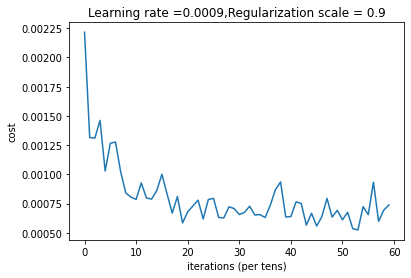

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.7818107
Test Accuracy: 0.71592593


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.002292
Cost after epoch 1: 0.001691
Cost after epoch 2: 0.001362
Cost after epoch 3: 0.001598
Cost after epoch 4: 0.001173
Cost after epoch 5: 0.001374
Cost after epoch 6: 0.001308
Cost after epoch 7: 0.001150
Cost after epoch 8: 0.000941
Cost after epoch 9: 0.001005
Cost after epoch 10: 0.000898
Cost after epoch 11: 0.000920
Cost after epoch 12: 0.001006
Cost after epoch 13: 0.000871
Cost after epoch 14: 0.001080
Cost after epoch 15: 0.001105
Cost after epoch 16: 0.000894
Cost after epoch 17: 0.000715
Cost after epoch 18: 0.000800
Cost after epoch 19: 0.000758
Cost after epoch 20: 0.000785
Cost after epoch 21: 0.001073
Cost after epoch 22: 0.000852
Cost after epoch 23: 0.000675
Cost after epoch 24: 0.000739
Cost after epoch 25: 0.000639
Cost after epoch 26: 0.000864
Cost after epoch 27: 0.001017
Cost after epoch 28: 0.000765
Cost after epoch 29: 0.000722


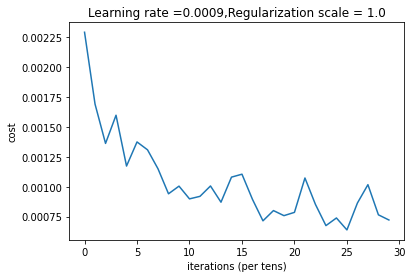

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.7668313
Test Accuracy: 0.7033333


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.002307
Cost after epoch 1: 0.001452
Cost after epoch 2: 0.001298
Cost after epoch 3: 0.001419
Cost after epoch 4: 0.001205
Cost after epoch 5: 0.001299
Cost after epoch 6: 0.001161
Cost after epoch 7: 0.001130
Cost after epoch 8: 0.000900
Cost after epoch 9: 0.001078
Cost after epoch 10: 0.000827
Cost after epoch 11: 0.000809
Cost after epoch 12: 0.000879
Cost after epoch 13: 0.000794
Cost after epoch 14: 0.000913
Cost after epoch 15: 0.001041
Cost after epoch 16: 0.000843
Cost after epoch 17: 0.000603
Cost after epoch 18: 0.000779
Cost after epoch 19: 0.000612
Cost after epoch 20: 0.000727
Cost after epoch 21: 0.000683
Cost after epoch 22: 0.000794
Cost after epoch 23: 0.000658
Cost after epoch 24: 0.000679
Cost after epoch 25: 0.000652
Cost after epoch 26: 0.000641
Cost after epoch 27: 0.000611
Cost after epoch 28: 0.000714
Cost after epoch 29: 0.000639
Cost after epoch 30: 0.000613
Cost after epoch 31: 0.000619
Cost after epoch 32: 0.000578
Cost after epoch 33:

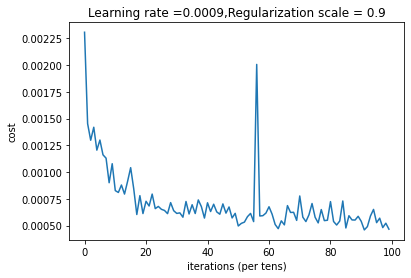

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.8176543
Test Accuracy: 0.74444443


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Cost after epoch 0: 0.002429
Cost after epoch 1: 0.001341
Cost after epoch 2: 0.001405
Cost after epoch 3: 0.001030
Cost after epoch 4: 0.001296
Cost after epoch 5: 0.001078
Cost after epoch 6: 0.000995
Cost after epoch 7: 0.001180
Cost after epoch 8: 0.000926
Cost after epoch 9: 0.000910
Cost after epoch 10: 0.000865
Cost after epoch 11: 0.001062
Cost after epoch 12: 0.000818
Cost after epoch 13: 0.000790
Cost after epoch 14: 0.000857
Cost after epoch 15: 0.000941
Cost after epoch 16: 0.000966
Cost after epoch 17: 0.000837
Cost after epoch 18: 0.000749
Cost after epoch 19: 0.001040
Cost after epoch 20: 0.000709
Cost after epoch 21: 0.001063
Cost after epoch 22: 0.000695
Cost after epoch 23: 0.000780
Cost after epoch 24: 0.001016
Cost after epoch 25: 0.000739
Cost after epoch 26: 0.000946
Cost after epoch 27: 0.000681
Cost after epoch 28: 0.000789
Cost after epoch 29: 0.001175
Cost after epoch 30: 0.000856
Cost after epoch 31: 0.000710
Cost after epoch 32: 0.000695
Cost after epoch 33:

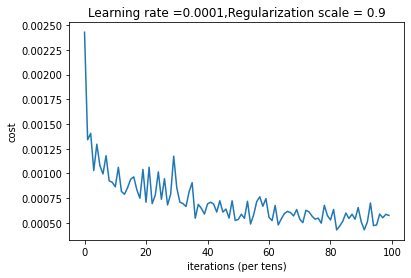

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.82707816
Test Accuracy: 0.74666667


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Cost after epoch 0: 0.000418
Cost after epoch 1: 0.000280
Cost after epoch 2: 0.000495
Cost after epoch 3: 0.000163
Cost after epoch 4: 0.000146
Cost after epoch 5: 0.000164
Cost after epoch 6: 0.000092
Cost after epoch 7: 0.000073
Cost after epoch 8: 0.000051
Cost after epoch 9: 0.000058
Cost after epoch 10: 0.000070
Cost after epoch 11: 0.000083
Cost after epoch 12: 0.000031
Cost after epoch 13: 0.000113
Cost after epoch 14: 0.000053
Cost after epoch 15: 0.000016
Cost after epoch 16: 0.000065
Cost after epoch 17: 0.000068
Cost after epoch 18: 0.000101
Cost after epoch 19: 0.000066
Cost after epoch 20: 0.000083
Cost after epoch 21: 0.000042
Cost after epoch 22: 0.000025
Cost after epoch 23: 0.000015
Cost after epoch 24: 0.000014
Cost after epoch 25: 0.000013
Cost after epoch 26: 0.000035
Cost after epoch 27: 0.000045
Cost after epoch 28: 0.000008
Cost after epoch 29: 0.000006


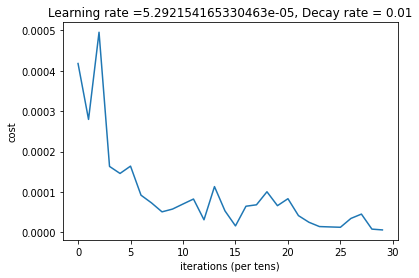

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.9626749
Test Accuracy: 0.7825926


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.000567
Cost after epoch 1: 0.000346
Cost after epoch 2: 0.000423
Cost after epoch 3: 0.000190
Cost after epoch 4: 0.000123
Cost after epoch 5: 0.000183
Cost after epoch 6: 0.000092
Cost after epoch 7: 0.000141
Cost after epoch 8: 0.000098
Cost after epoch 9: 0.000071
Cost after epoch 10: 0.000087
Cost after epoch 11: 0.000155
Cost after epoch 12: 0.000084
Cost after epoch 13: 0.000037
Cost after epoch 14: 0.000037
Cost after epoch 15: 0.000026
Cost after epoch 16: 0.000043
Cost after epoch 17: 0.000060
Cost after epoch 18: 0.000026
Cost after epoch 19: 0.000325
Cost after epoch 20: 0.000080
Cost after epoch 21: 0.000034
Cost after epoch 22: 0.000048
Cost after epoch 23: 0.000020
Cost after epoch 24: 0.000021
Cost after epoch 25: 0.000023
Cost after epoch 26: 0.000019
Cost after epoch 27: 0.000114
Cost after epoch 28: 0.000021
Cost after epoch 29: 0.000015
Cost after epoch 30: 0.000006
Cost after epoch 31: 0.000037
Cost after epoch 32: 0.000017
Cost after epoch 33:

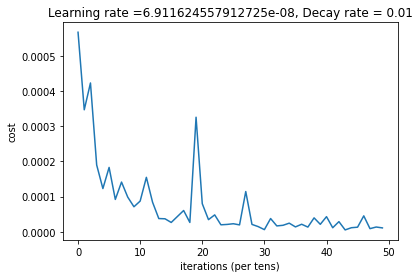

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.96563786
Test Accuracy: 0.7725926


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.000484
Cost after epoch 1: 0.000427
Cost after epoch 2: 0.001021
Cost after epoch 3: 0.000156
Cost after epoch 4: 0.000497
Cost after epoch 5: 0.000164
Cost after epoch 6: 0.000084
Cost after epoch 7: 0.000152
Cost after epoch 8: 0.000045
Cost after epoch 9: 0.000080
Cost after epoch 10: 0.000063
Cost after epoch 11: 0.000052
Cost after epoch 12: 0.000108
Cost after epoch 13: 0.000091
Cost after epoch 14: 0.000046
Cost after epoch 15: 0.000043
Cost after epoch 16: 0.000048
Cost after epoch 17: 0.000043
Cost after epoch 18: 0.000056
Cost after epoch 19: 0.000031
Cost after epoch 20: 0.000052
Cost after epoch 21: 0.000019
Cost after epoch 22: 0.000029
Cost after epoch 23: 0.000083
Cost after epoch 24: 0.000025
Cost after epoch 25: 0.000027
Cost after epoch 26: 0.000068
Cost after epoch 27: 0.000030
Cost after epoch 28: 0.000049
Cost after epoch 29: 0.000025
Cost after epoch 30: 0.000017
Cost after epoch 31: 0.000054
Cost after epoch 32: 0.000048
Cost after epoch 33:

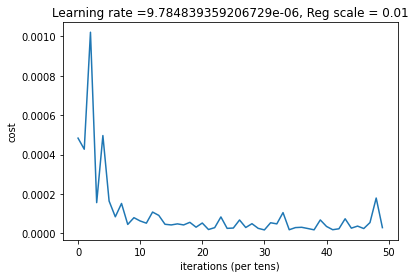

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.9657202
Test Accuracy: 0.78407407


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 0.000439
Cost after epoch 1: 0.000406
Cost after epoch 2: 0.000411
Cost after epoch 3: 0.000223
Cost after epoch 4: 0.000333
Cost after epoch 5: 0.000192
Cost after epoch 6: 0.000155
Cost after epoch 7: 0.000171
Cost after epoch 8: 0.000121
Cost after epoch 9: 0.000119
Cost after epoch 10: 0.000124
Cost after epoch 11: 0.000130
Cost after epoch 12: 0.000148
Cost after epoch 13: 0.000158
Cost after epoch 14: 0.000137
Cost after epoch 15: 0.000117
Cost after epoch 16: 0.000119
Cost after epoch 17: 0.000118
Cost after epoch 18: 0.000161
Cost after epoch 19: 0.000173
Cost after epoch 20: 0.000115
Cost after epoch 21: 0.000121
Cost after epoch 22: 0.000119
Cost after epoch 23: 0.000234
Cost after epoch 24: 0.000113
Cost after epoch 25: 0.000150
Cost after epoch 26: 0.000207
Cost after epoch 27: 0.000113
Cost after epoch 28: 0.000168
Cost after epoch 29: 0.000136
Cost after epoch 30: 0.000127
Cost after epoch 31: 0.000163
Cost after epoch 32: 0.000109
Cost after epoch 33:

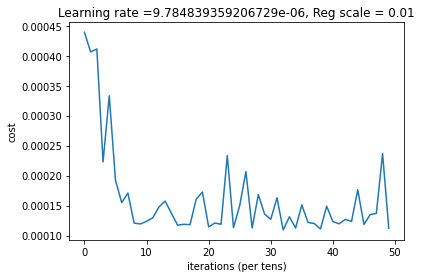

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.96666664
Test Accuracy: 0.7966667


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)

Reg scale above is 0.05

Cost after epoch 0: 0.000650
Cost after epoch 1: 0.000465
Cost after epoch 2: 0.000489
Cost after epoch 3: 0.000259
Cost after epoch 4: 0.000343
Cost after epoch 5: 0.000338
Cost after epoch 6: 0.000220
Cost after epoch 7: 0.000239
Cost after epoch 8: 0.000194
Cost after epoch 9: 0.000191
Cost after epoch 10: 0.000232
Cost after epoch 11: 0.000223
Cost after epoch 12: 0.000215
Cost after epoch 13: 0.000242
Cost after epoch 14: 0.000194
Cost after epoch 15: 0.000219
Cost after epoch 16: 0.000246
Cost after epoch 17: 0.000189
Cost after epoch 18: 0.000237
Cost after epoch 19: 0.000207
Cost after epoch 20: 0.000241
Cost after epoch 21: 0.000177
Cost after epoch 22: 0.000209
Cost after epoch 23: 0.000208
Cost after epoch 24: 0.000182
Cost after epoch 25: 0.000216
Cost after epoch 26: 0.000400
Cost after epoch 27: 0.000166
Cost after epoch 28: 0.000171
Cost after epoch 29: 0.000178
Cost after epoch 30: 0.000165
Cost after epoch 31: 0.000196
Cost after epoch 32: 0.000151
Cost after epoch 33:

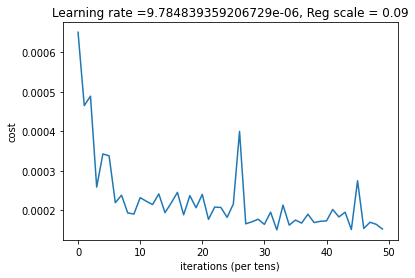

Tensor("Mean_1:0", shape=(), dtype=float32)
Accuracies:
Train Accuracy: 0.94864196
Test Accuracy: 0.79851854


In [ ]:
_,_, parameters = model(X_train, Y_train, X_test, Y_test)